In [3]:
#Nama  : Adifa Syahira
#Nim   : 1103202067
#Kelas : TK4403

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

In [4]:
df = pd.read_csv(r"D:\KULIAH DIFA\Semester 7 HUHU\Machine Learning\Minggu 4\archive (2)\diamonds.csv")

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
# Menampilkan jumlah nilai unik untuk setiap fitur
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

for feature in features:
    print(f"Jumlah unique value for {feature}: {df[feature].nunique()}")

Jumlah unique value for carat: 273
Jumlah unique value for cut: 5
Jumlah unique value for color: 7
Jumlah unique value for clarity: 8
Jumlah unique value for depth: 184
Jumlah unique value for table: 127
Jumlah unique value for price: 11602
Jumlah unique value for x: 554
Jumlah unique value for y: 552
Jumlah unique value for z: 375


In [9]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
# Mengelompokkan numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Mengelompokkan categorical features
categorical_features = ['cut', 'color', 'clarity']

# Mengelompokkan target
target = ['price']

# Menampilkan hasil pengelompokkan
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Target:", target)

Numerical Features: ['carat', 'depth', 'table', 'x', 'y', 'z']
Categorical Features: ['cut', 'color', 'clarity']
Target: ['price']


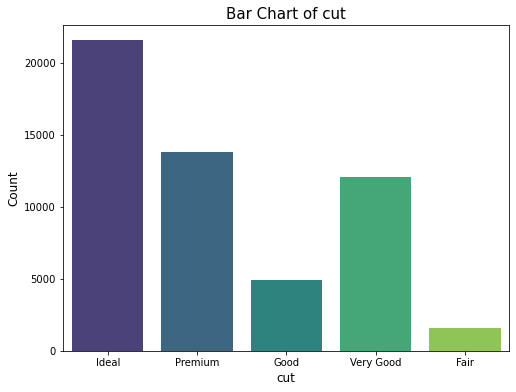

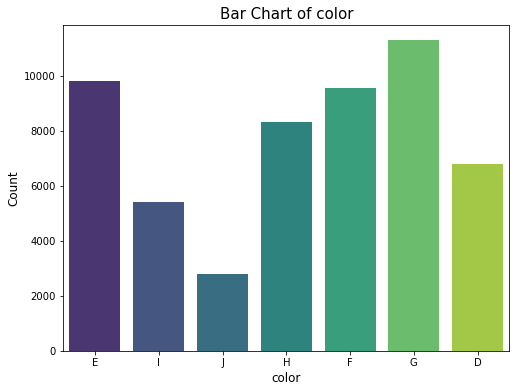

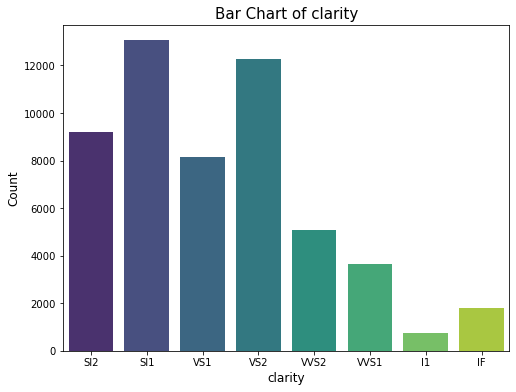

In [11]:
# Membuat bar chart untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Bar Chart of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Count', size=12)
    plt.show()

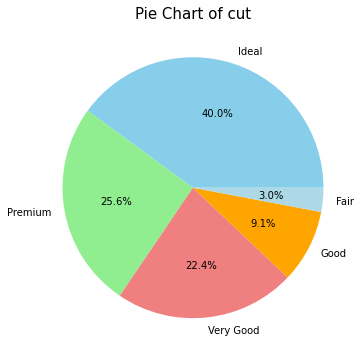

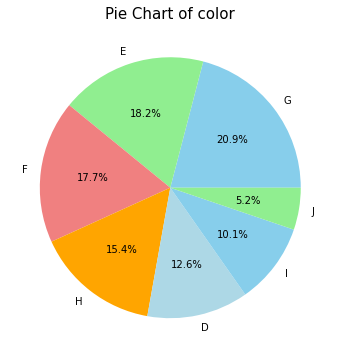

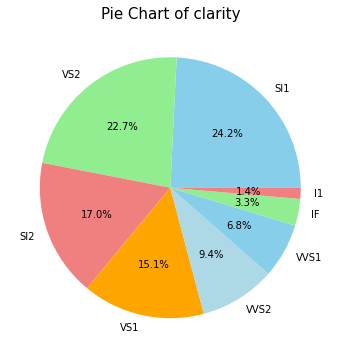

In [12]:
# Membuat pie chart untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue'])
    plt.title(f'Pie Chart of {feature}', size=15)
    plt.ylabel('')
    plt.show()

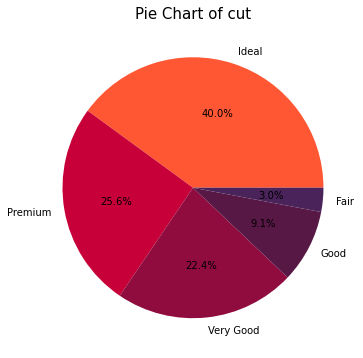

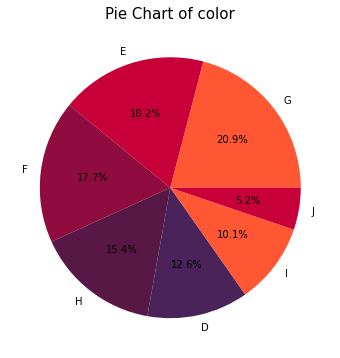

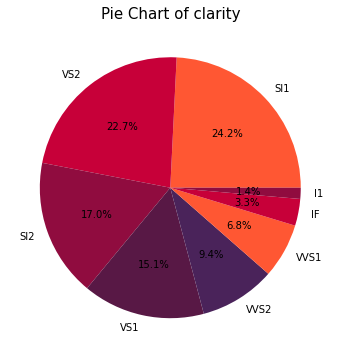

In [13]:
# Membuat pie chart untuk setiap fitur kategorikal dengan warna gelap
dark_colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#4A235A']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=dark_colors)
    plt.title(f'Pie Chart of {feature}', size=15)
    plt.ylabel('')
    plt.show()

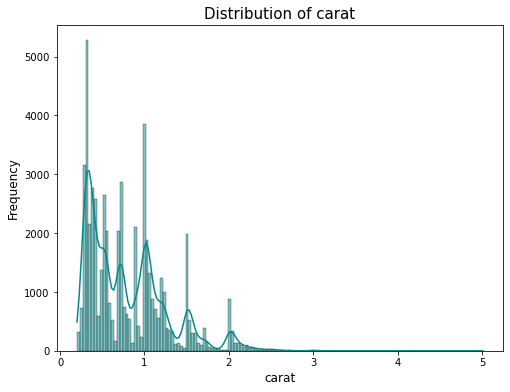

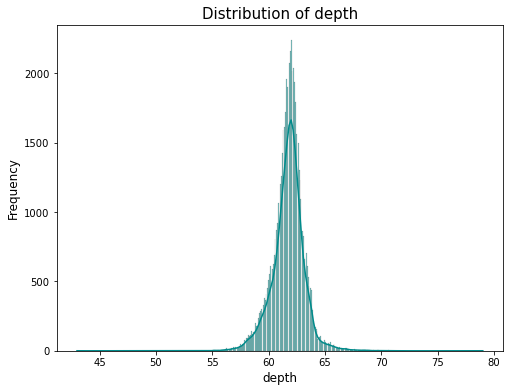

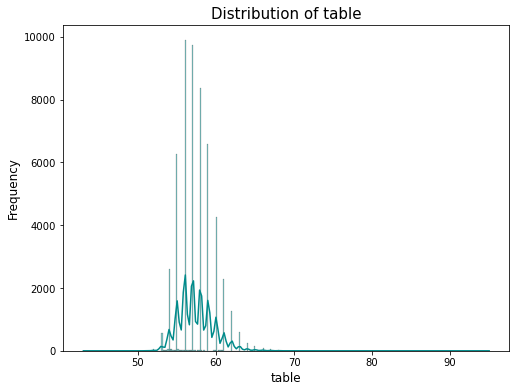

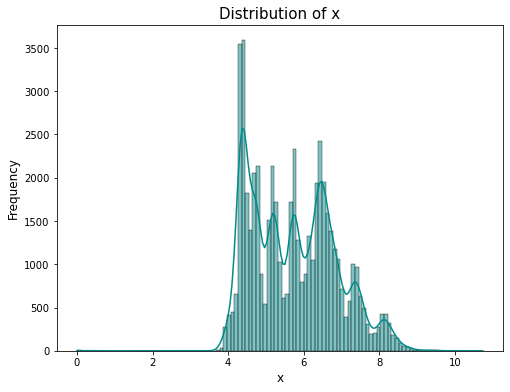

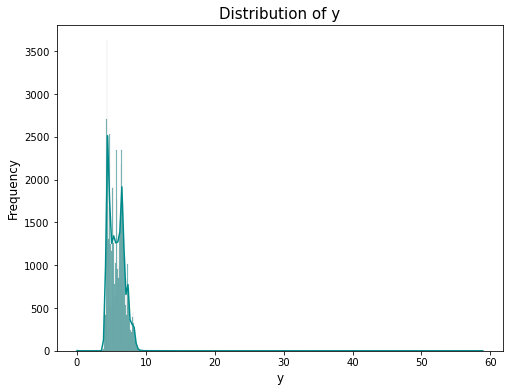

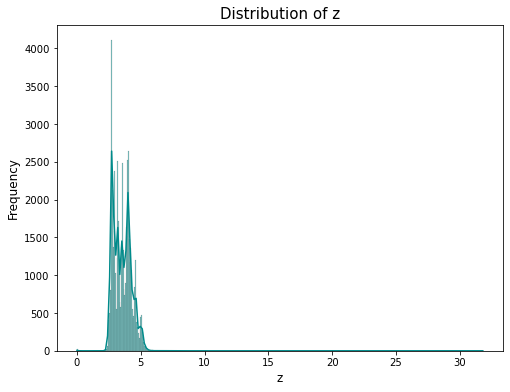

In [14]:
# Mengelompokkan numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat distribusi untuk setiap fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='darkcyan')
    plt.title(f'Distribution of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

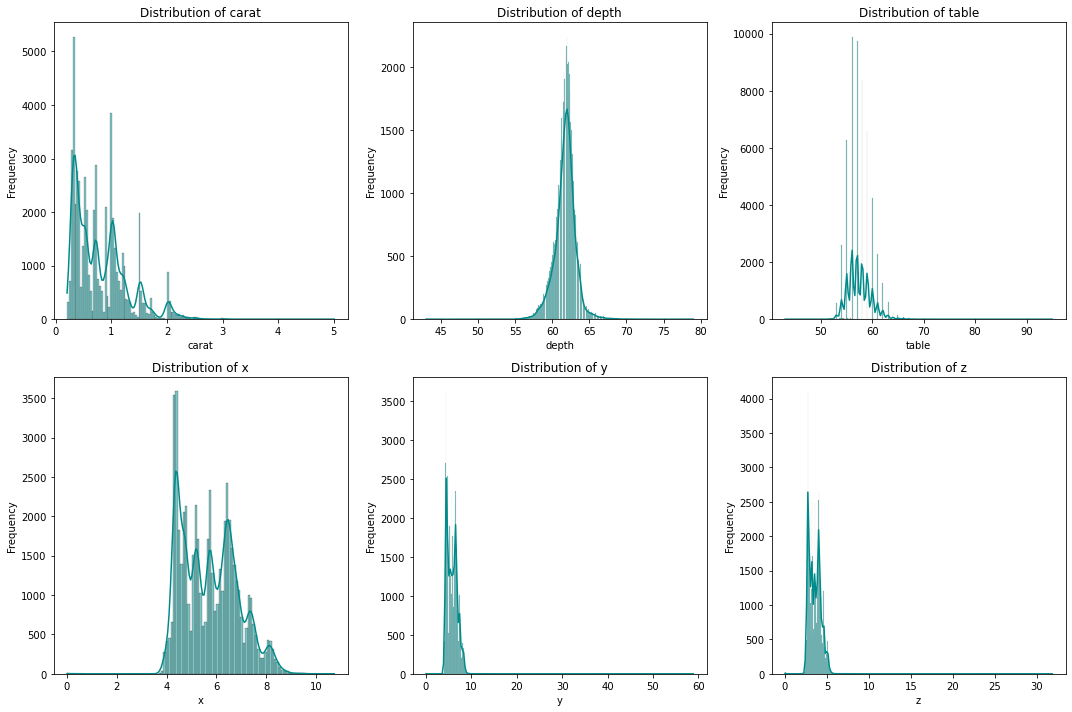

In [15]:
# Membuat distribusi untuk setiap fitur numerik dalam tata letak 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, color='darkcyan', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}', size=12)
    axes[i//3, i%3].set_xlabel(feature, size=10)
    axes[i//3, i%3].set_ylabel('Frequency', size=10)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

In [16]:

# Fungsi untuk menampilkan distribusi dengan interaktif bin width
def plot_histogram(feature, bin_width):
    plt.figure(figsize=(8, 6))
    bins = np.arange(min(df[feature]), max(df[feature]) + bin_width, bin_width)
    sns.histplot(df[feature], bins=bins, kde=True, color='darkcyan')
    plt.title(f'Distribution of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

# Menampilkan slider interaktif untuk setiap fitur numerik
for feature in numerical_features:
    interact(plot_histogram, feature=widgets.fixed(feature), bin_width=(0.1, 1, 0.1))

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

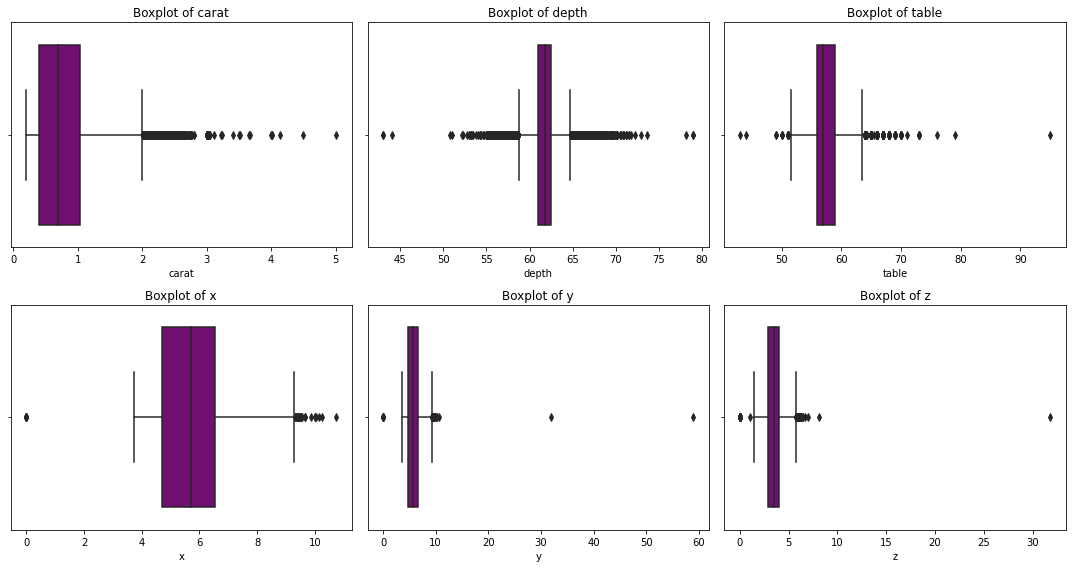

In [17]:

# Membuat boxplot untuk setiap fitur numerik dalam tata letak 2x3 dengan orientasi horizontal
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i // 3, i % 3], orient='h', color='purple')
    axes[i // 3, i % 3].set_title(f'Boxplot of {feature}', size=12)
    axes[i // 3, i % 3].set_xlabel(feature, size=10)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()